In [1]:
import math
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
# MacOS matplotlib kernel issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Results of DCGAN
When discriminator was trained on combined real and generated data

In [2]:
df = pd.read_csv('comb_log.csv')
df

Step  DiscLoss   DiscAcc   GANLoss    GANAcc
0       1  0.728140  0.398438  0.625266  1.000000
1       2  2.219768  0.500000  2.193360  0.000000
2       3  0.441211  0.914062  0.840980  0.000000
3       4  0.489909  0.500000  0.691396  0.500000
4       5  2.183175  0.500000  2.514047  0.000000
..    ...       ...       ...       ...       ...
495   496  0.844884  0.476562  0.568940  0.875000
496   497  0.818683  0.414062  1.133311  0.078125
497   498  0.779139  0.437500  0.672482  0.515625
498   499  0.767689  0.429688  0.920730  0.187500
499   500  0.790078  0.359375  0.800905  0.343750

[500 rows x 5 columns]

In [3]:
disc_df = df[['Step', 'DiscLoss', 'DiscAcc']]
disc_df = disc_df.rename(columns={'DiscLoss': 'Loss', 'DiscAcc': 'Accuracy'})
disc_df['Name'] = 'Discriminator'
gan_df = df[['Step', 'GANLoss', 'GANAcc']]
gan_df = gan_df.rename(columns={'GANLoss': 'Loss', 'GANAcc': 'Accuracy'})
gan_df['Name'] = 'GAN'
combined_df = pd.concat([disc_df, gan_df])

In [4]:
fig = px.line(combined_df, x='Step', y='Loss', color='Name', line_group='Name', title='Plot of Discriminator and GAN Losses')
fig.show()

In [5]:
fig = px.line(combined_df, x='Step', y='Accuracy', color='Name', line_group='Name', title='Plot of Discriminator and GAN Accuracies')
fig.show()

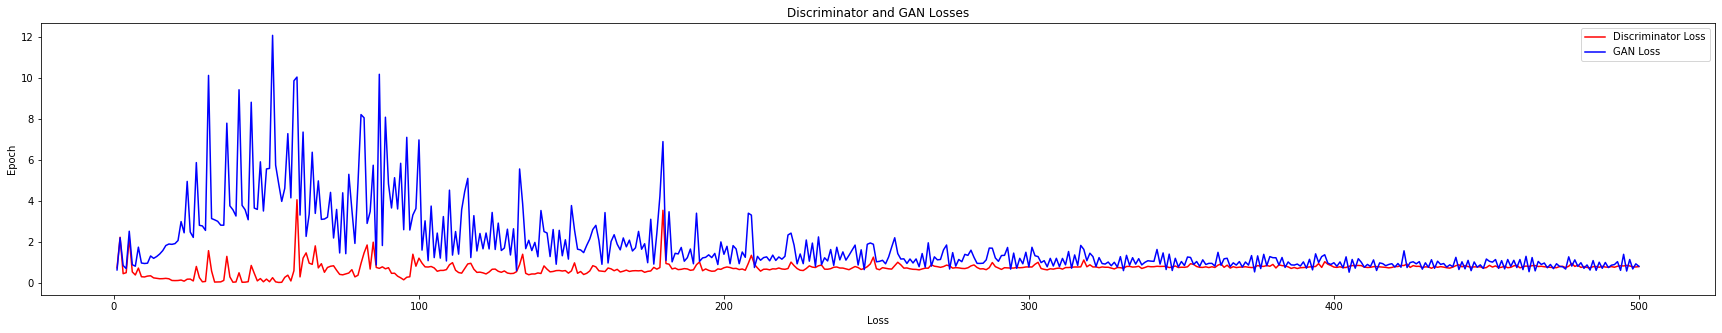

In [6]:
plt.figure(figsize=(30,5))
plt.plot(df['Step'],df['DiscLoss'],'b',label='Discriminator Loss', c='red')
plt.plot(df['Step'],df['GANLoss'],'b',label='GAN Loss', c='blue')
plt.title('Discriminator and GAN Losses')
plt.ylabel('Epoch')
plt.xlabel('Loss')
plt.legend(loc='best')
plt.show()

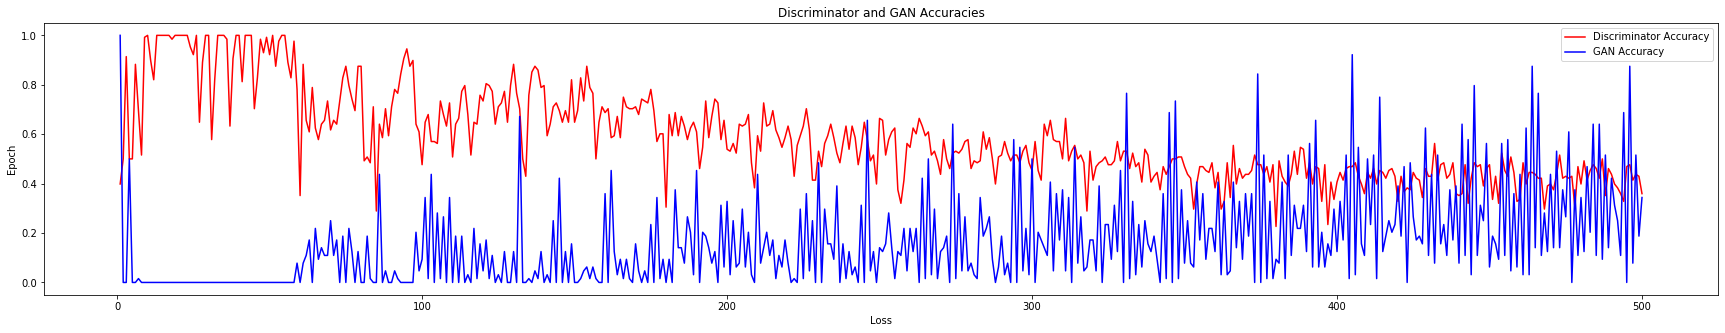

In [7]:
plt.figure(figsize=(30,5))
plt.plot(df['Step'],df['DiscAcc'],'b',label='Discriminator Accuracy', c='red')
plt.plot(df['Step'],df['GANAcc'],'b',label='GAN Accuracy', c='blue')
plt.title('Discriminator and GAN Accuracies')
plt.ylabel('Epoch')
plt.xlabel('Loss')
plt.legend(loc='best')
plt.show()

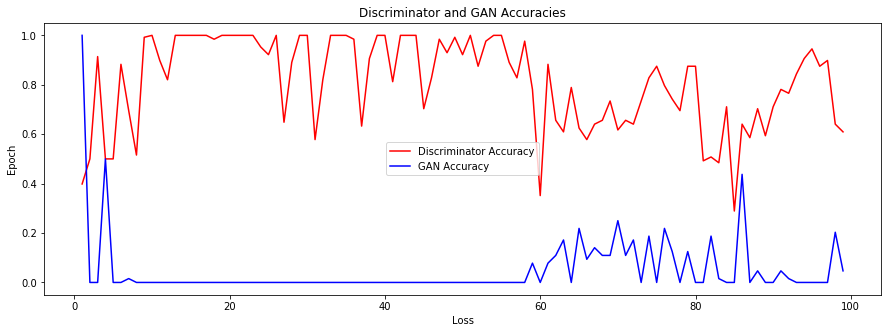

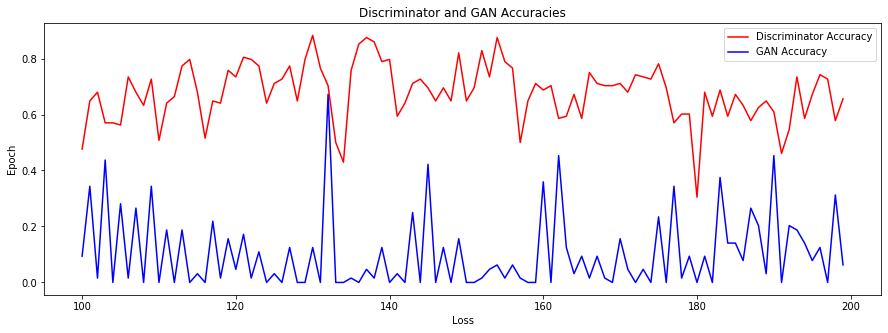

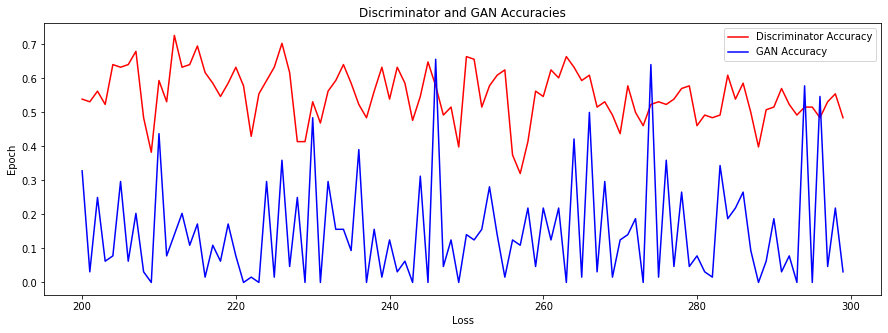

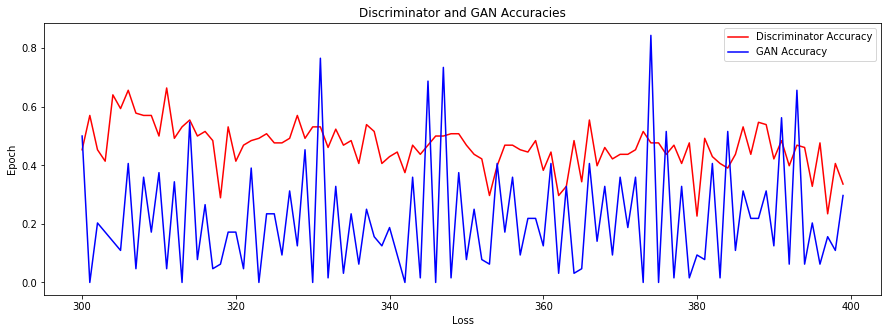

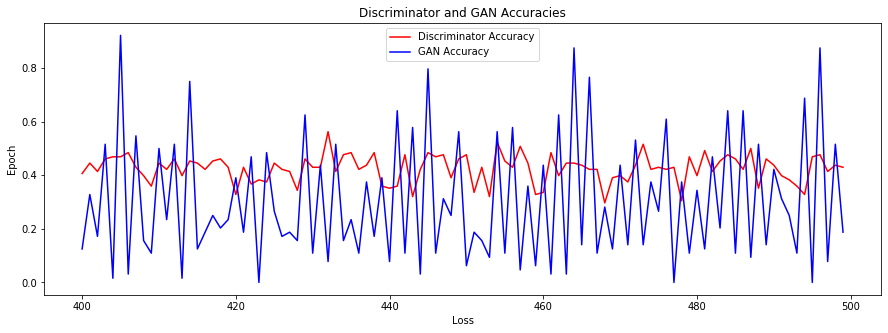

In [8]:
rounded = int(math.ceil(len(df) / 100.0)) * 100
ranges = np.arange(0, (rounded + 100), 100)
for i in range(len(ranges[:-1])):
    df_slice = df.loc[(df['Step'] >= ranges[i]) & (df['Step'] <ranges[i+1])]
    plt.figure(figsize=(15,5))
    plt.plot(df_slice['Step'],df_slice['DiscAcc'],'b',label='Discriminator Accuracy', c='red')
    plt.plot(df_slice['Step'],df_slice['GANAcc'],'b',label='GAN Accuracy', c='blue')
    plt.title('Discriminator and GAN Accuracies')
    plt.ylabel('Epoch')
    plt.xlabel('Loss')
    plt.legend(loc='best')
    plt.show()

# Results of DCGAN
When discriminator was trained on real and generated data separately

In [9]:
df = pd.read_csv('log.csv')
df

Step  RealDiscLoss  RealDiscAcc  GenDiscLoss  GenDiscAcc   GANLoss  \
0        1      0.779324     0.218750     0.799633    0.000000  0.795834   
1        2      0.005954     1.000000     5.723202    0.000000  4.849713   
2        3      1.550993     0.640625     0.603883    1.000000  0.870077   
3        4      0.059386     0.984375     0.792871    0.031250  0.791592   
4        5      0.007173     1.000000     1.833074    0.000000  2.155777   
...    ...           ...          ...          ...         ...       ...   
1995  1996      0.788987     0.171875     0.844734    0.046875  0.740003   
1996  1997      0.745817     0.406250     0.875362    0.000000  0.804903   
1997  1998      0.763433     0.281250     0.834415    0.078125  0.756300   
1998  1999      0.754069     0.171875     0.828272    0.109375  0.762048   
1999  2000      0.748381     0.140625     0.863658    0.046875  0.766273   

        GANAcc  
0     0.000000  
1     0.000000  
2     0.000000  
3     0.015625  
4     0.000000  
...        ...  
1995  0.359375  
1996  0.156250  
1997  0.281250  
1998  0.203125  
1999  0.203125  

[2000 rows x 7 columns]

In [10]:
real_disc_df = df[['Step', 'RealDiscLoss', 'RealDiscAcc']]
real_disc_df = real_disc_df.rename(columns={'RealDiscLoss': 'Loss', 'RealDiscAcc': 'Accuracy'})
real_disc_df['Name'] = 'Real Discriminator'

gen_disc_df = df[['Step', 'GenDiscLoss', 'GenDiscAcc']]
gen_disc_df = gen_disc_df.rename(columns={'GenDiscLoss': 'Loss', 'GenDiscAcc': 'Accuracy'})
gen_disc_df['Name'] = 'Fake Discriminator'

gan_df = df[['Step', 'GANLoss', 'GANAcc']]
gan_df = gan_df.rename(columns={'GANLoss': 'Loss', 'GANAcc': 'Accuracy'})
gan_df['Name'] = 'GAN'

combined_df = pd.concat([real_disc_df, gen_disc_df, gan_df])

In [11]:
fig = px.line(combined_df, x='Step', y='Loss', color='Name', line_group='Name', title='Plot of Discriminator and GAN Losses')
fig.show()

In [12]:
fig = px.line(combined_df, x='Step', y='Accuracy', color='Name', line_group='Name', title='Plot of Discriminator and GAN Accuracies')
fig.show()

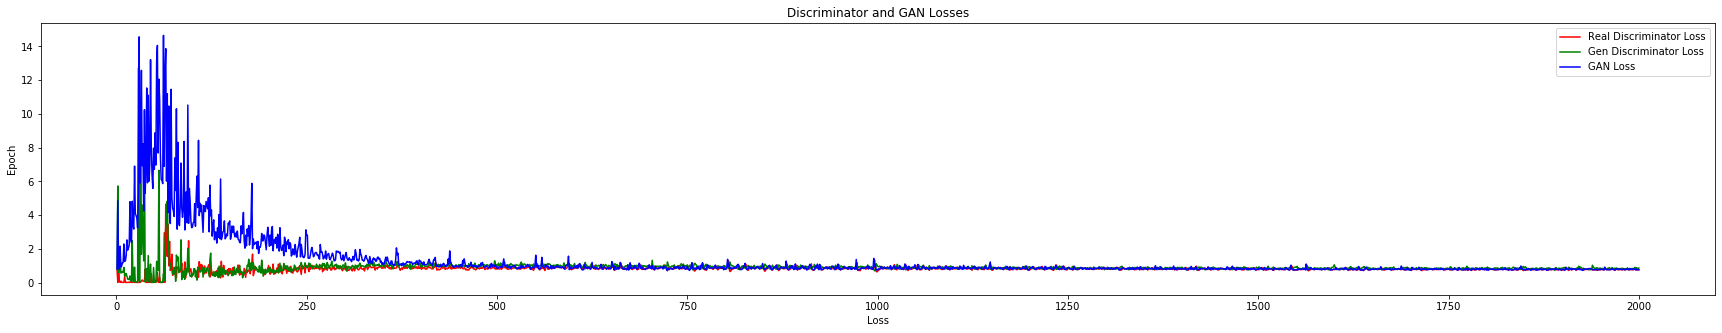

In [13]:
plt.figure(figsize=(30,5))
plt.plot(df['Step'],df['RealDiscLoss'],'b',label='Real Discriminator Loss', c='red')
plt.plot(df['Step'],df['GenDiscLoss'],'b',label='Gen Discriminator Loss', c='green')
plt.plot(df['Step'],df['GANLoss'],'b',label='GAN Loss', c='blue')
plt.title('Discriminator and GAN Losses')
plt.ylabel('Epoch')
plt.xlabel('Loss')
plt.legend(loc='best')
plt.show()

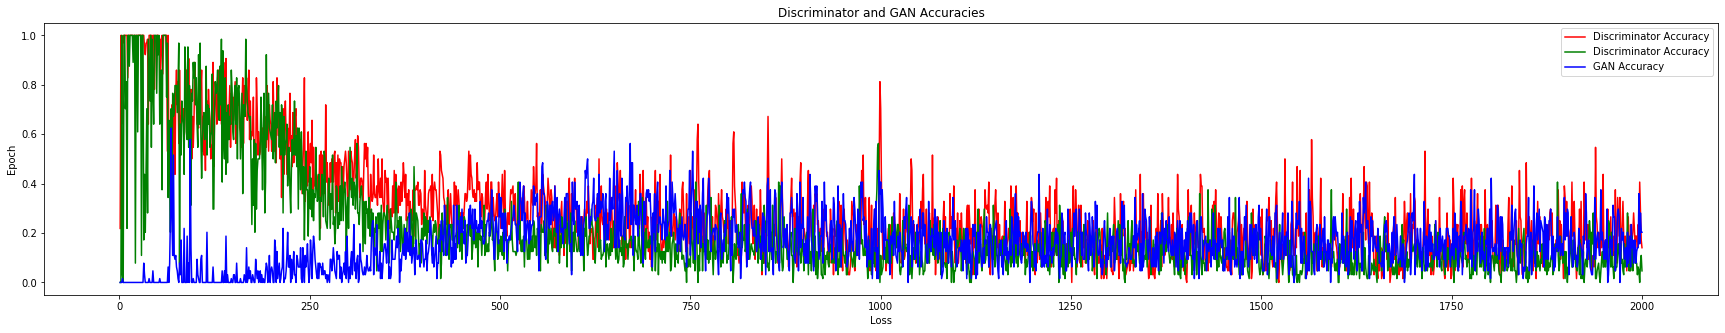

In [14]:
plt.figure(figsize=(30,5))
plt.plot(df['Step'],df['RealDiscAcc'],'b',label='Discriminator Accuracy', c='red')
plt.plot(df['Step'],df['GenDiscAcc'],'b',label='Discriminator Accuracy', c='green')
plt.plot(df['Step'],df['GANAcc'],'b',label='GAN Accuracy', c='blue')
plt.title('Discriminator and GAN Accuracies')
plt.ylabel('Epoch')
plt.xlabel('Loss')
plt.legend(loc='best')
plt.show()

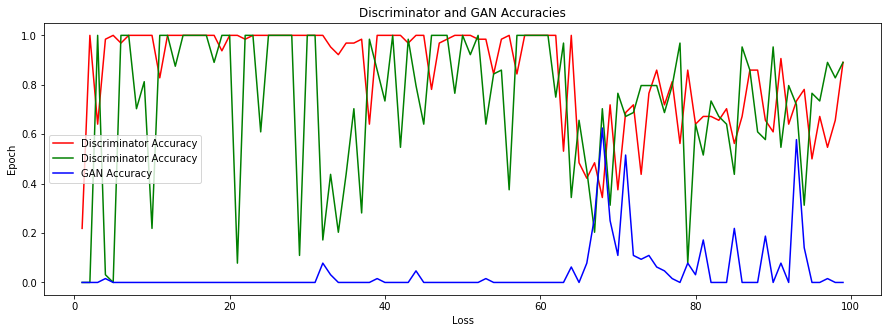

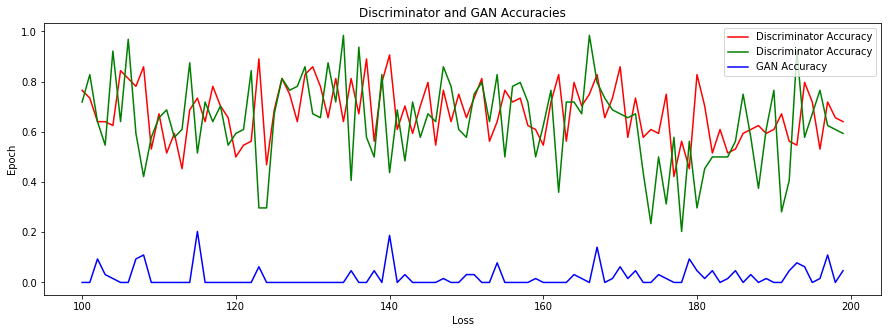

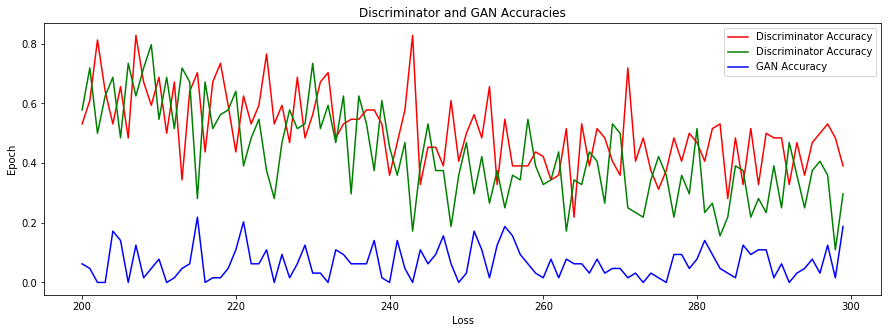

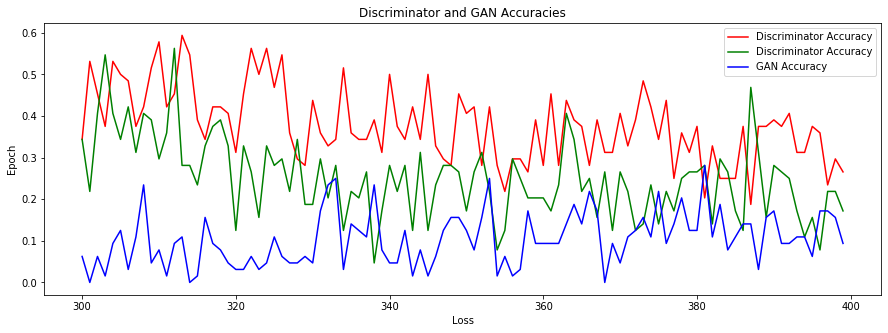

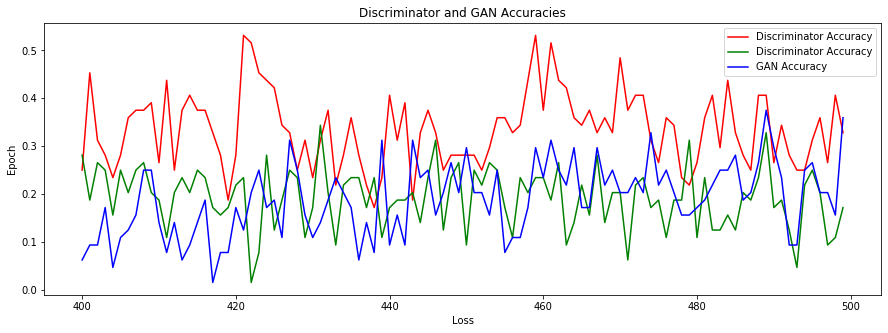

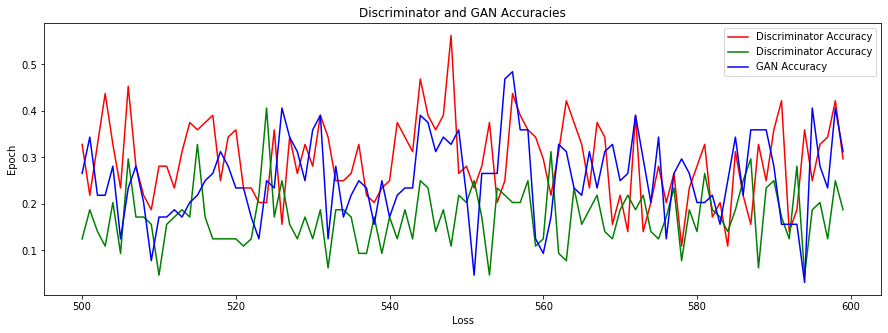

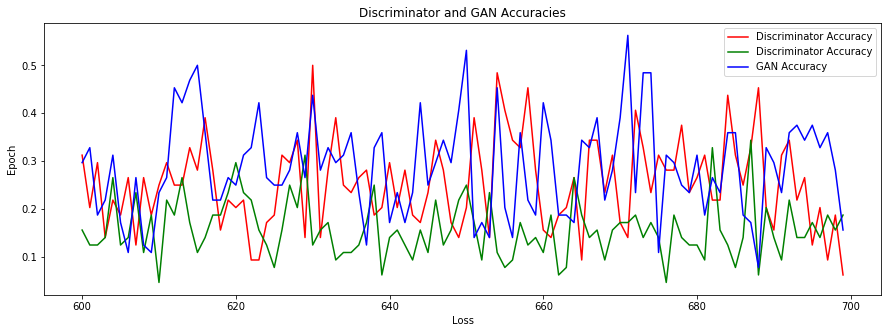

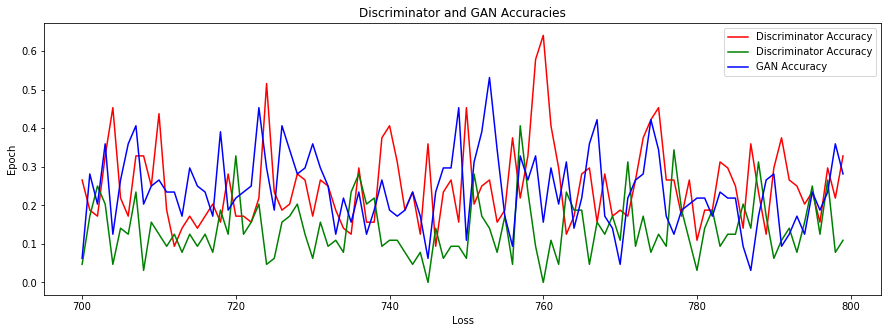

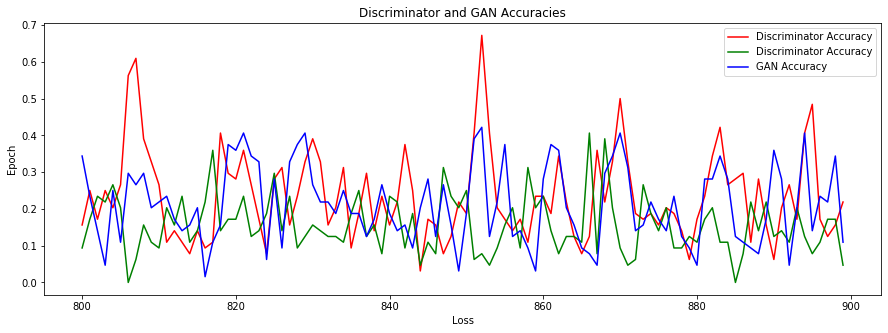

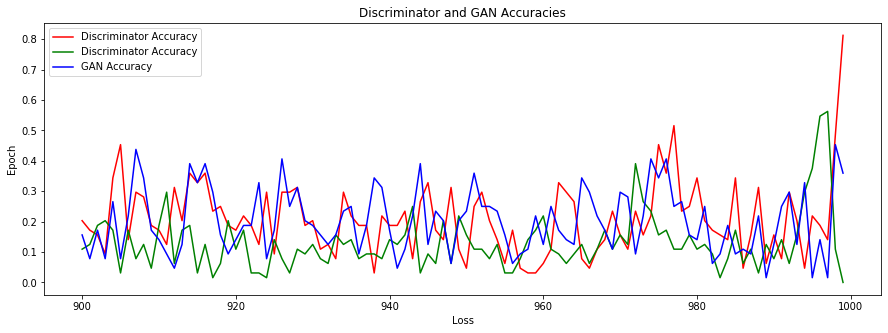

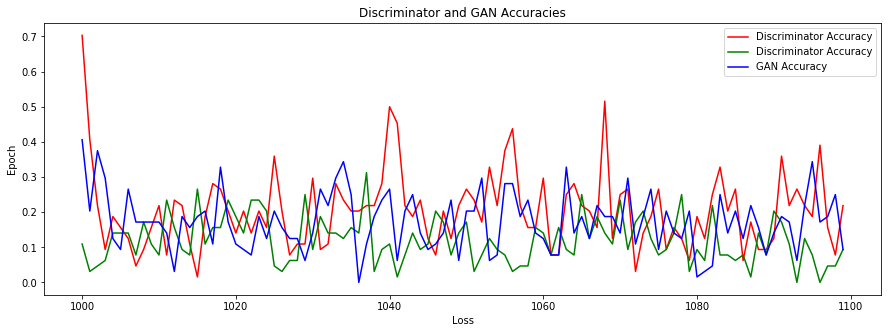

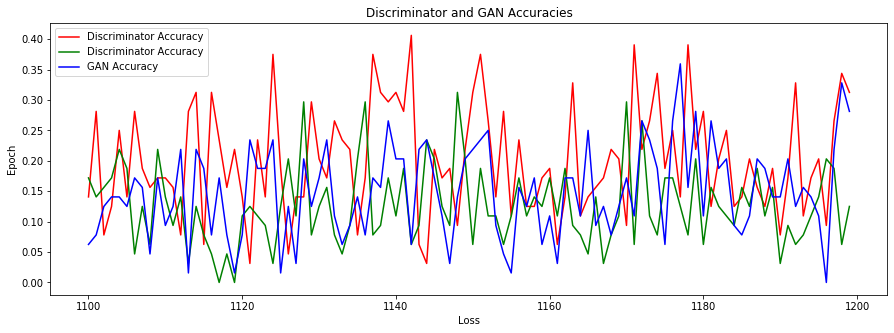

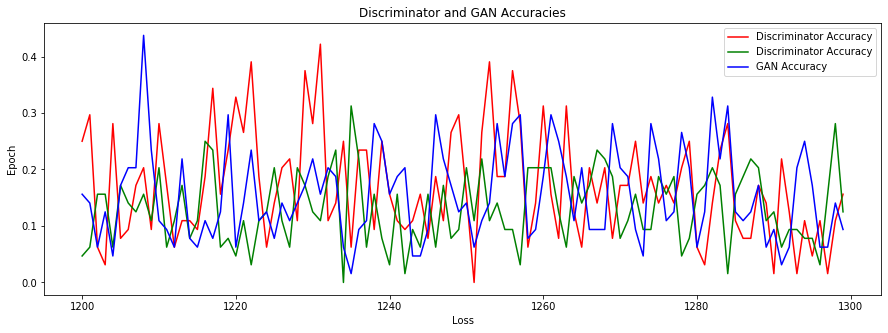

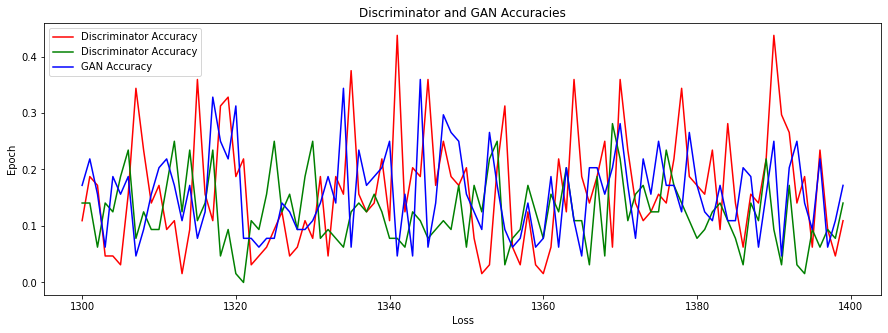

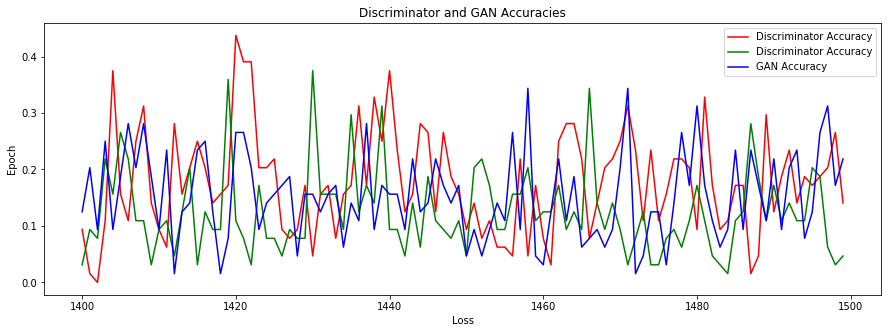

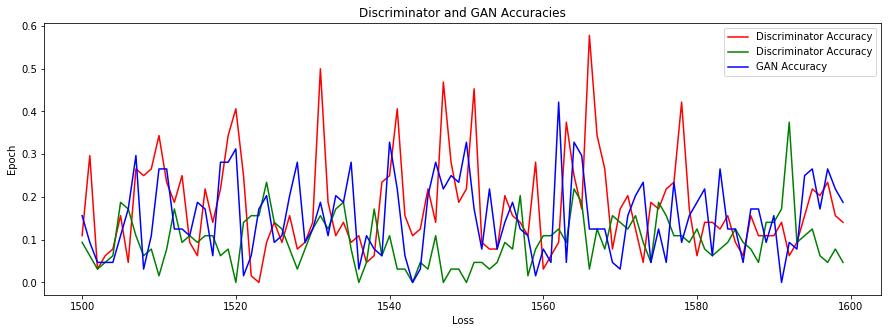

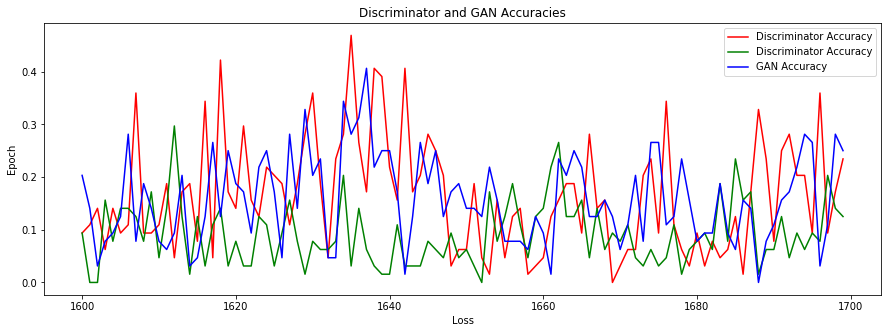

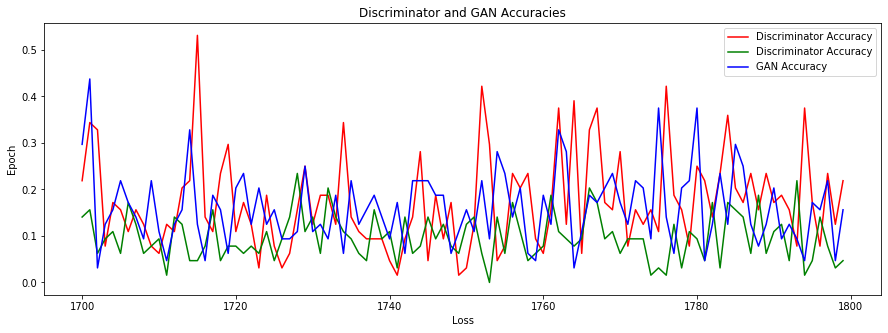

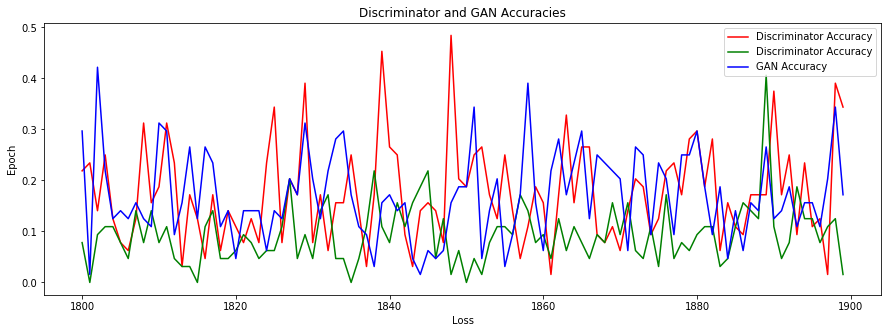

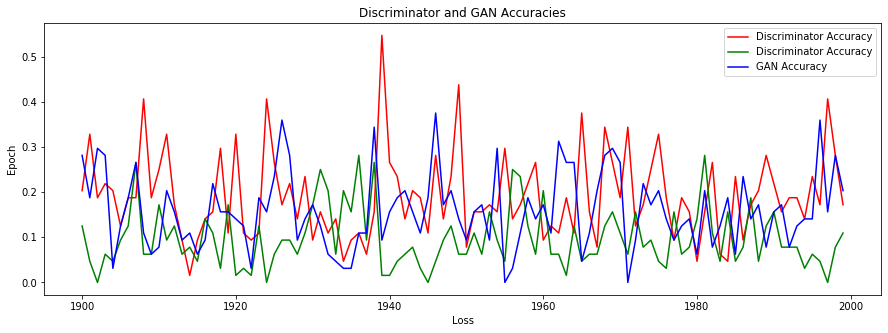

In [15]:
rounded = int(math.ceil(len(df) / 100.0)) * 100
ranges = np.arange(0, (rounded + 100), 100)
for i in range(len(ranges[:-1])):
    df_slice = df.loc[(df['Step'] >= ranges[i]) & (df['Step'] <ranges[i+1])]
    plt.figure(figsize=(15,5))
    plt.plot(df_slice['Step'],df_slice['RealDiscAcc'],'b',label='Discriminator Accuracy', c='red')
    plt.plot(df_slice['Step'],df_slice['GenDiscAcc'],'b',label='Discriminator Accuracy', c='green')
    plt.plot(df_slice['Step'],df_slice['GANAcc'],'b',label='GAN Accuracy', c='blue')
    plt.title('Discriminator and GAN Accuracies')
    plt.ylabel('Epoch')
    plt.xlabel('Loss')
    plt.legend(loc='best')
    plt.show()